In [1]:
from __future__ import division

import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
from keras.preprocessing import image

Using TensorFlow backend.
/Users/reubenfeinman/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def load_image_dataset(nb_categories, nb_exemplars, data_folder,
                        target_size=(200, 200)):
    # First load the images
    imgs = []
    files = [file for file in os.listdir(data_folder) if file.endswith('png')]
    files = sorted(files)
    for file in files:
        img_path = os.path.join(data_folder, file)
        img = image.load_img(img_path, target_size=target_size,
                             interpolation='bicubic')
        imgs.append(image.img_to_array(img))
    imgs = np.asarray(imgs)
    imgs /= 255.
    # Now load the feature info
    feature_file = os.path.join(data_folder, 'data.csv')
    df = pd.read_csv(feature_file, index_col=0)
    # Collect a subset of the data according to nb_categories, nb_exemplars
    ix = []
    for cat in range(nb_categories):
        ix_cat = df[df['shape'] == cat].index.tolist()
        ix_cat = ix_cat[:nb_exemplars+1]
        ix.extend(ix_cat)
    imgs = imgs[ix]
    df = df.iloc[ix]

    return imgs, df['shape'].as_matrix()

In [14]:
nb_categories = 10
nb_exemplars = 2
data_folder = '../data/images_generated/'
imgs, df = load_image_dataset(nb_categories, nb_exemplars, data_folder, target_size=(300,300))

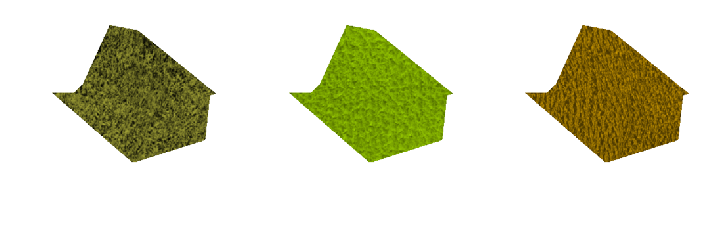

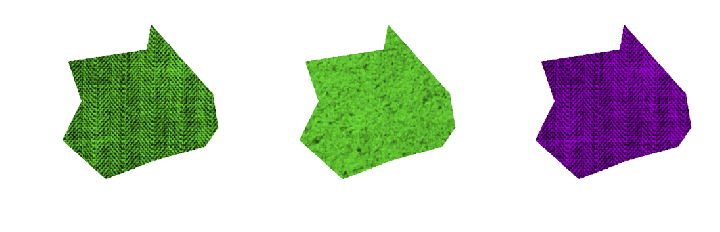

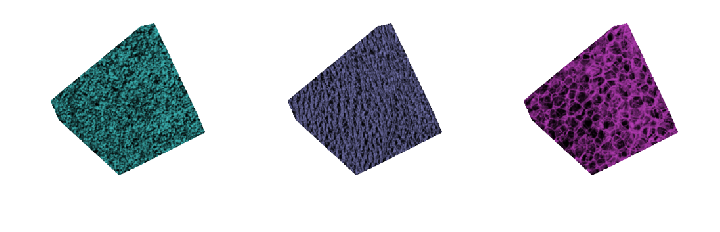

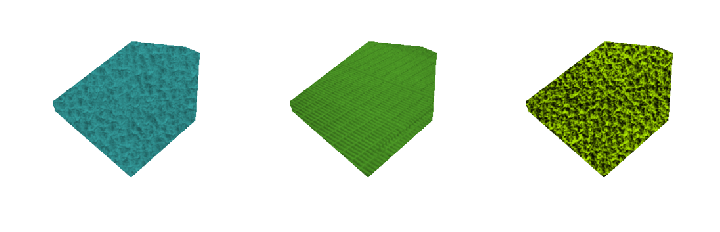

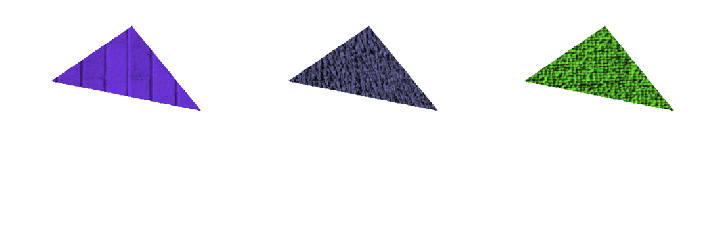

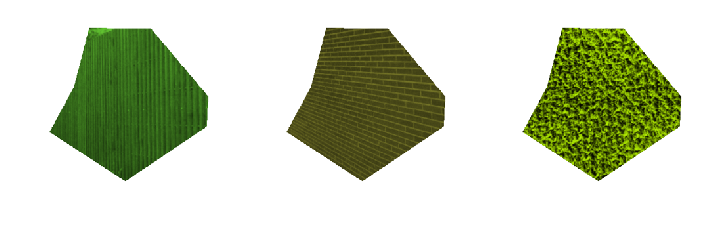

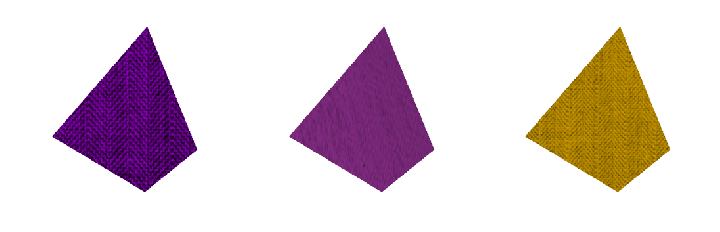

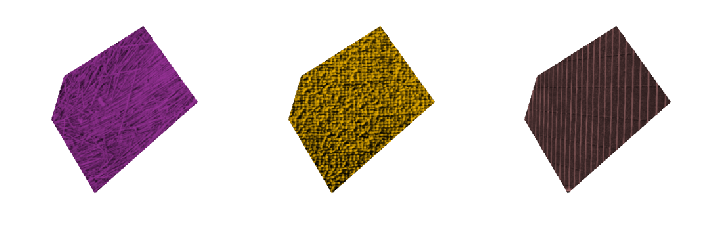

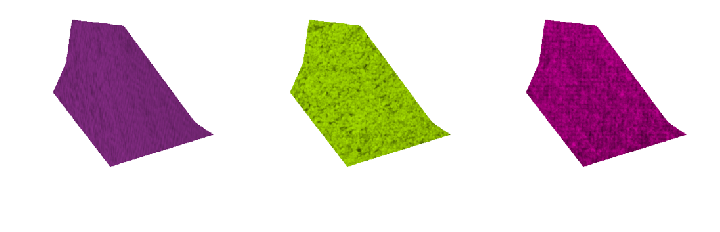

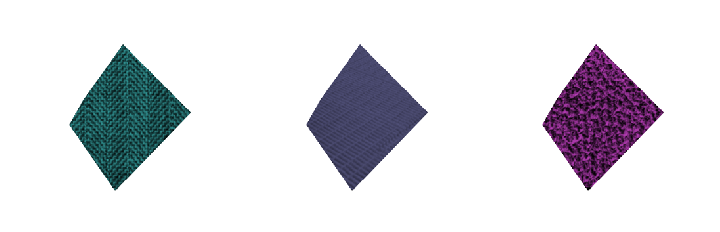

In [15]:
for i in range(nb_categories):
    fig, axes = plt.subplots(nrows=1, ncols=nb_exemplars+1, figsize=(12, 4))
    for j in range(nb_exemplars+1):
        axes[j].imshow(imgs[i*(nb_exemplars+1)+j])
        axes[j].axis('off')
    plt.show()

In [17]:
def load_texture_dataset(data_folder, target_size=(200, 200)):
    # First load the images
    imgs = []
    files = [file for file in os.listdir(data_folder) if file.endswith('tiff')]
    files = sorted(files)
    for file in files:
        img_path = os.path.join(data_folder, file)
        img = image.load_img(img_path, target_size=target_size, interpolation='bicubic')
        imgs.append(image.img_to_array(img))
    return np.asarray(imgs)

In [18]:
textures = load_texture_dataset('../data/textures', (300, 300))

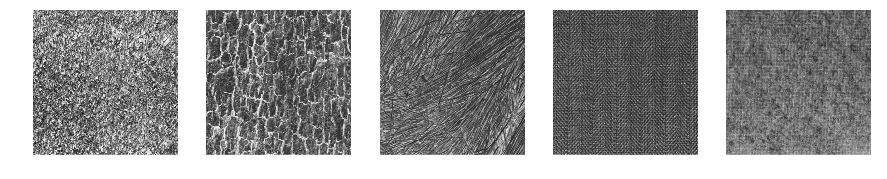

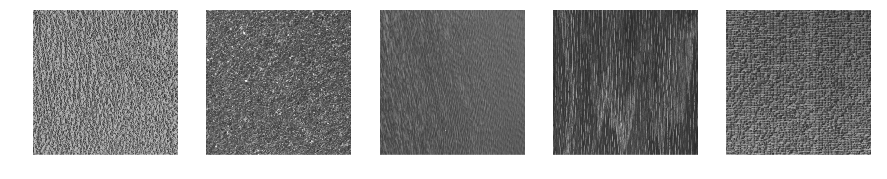

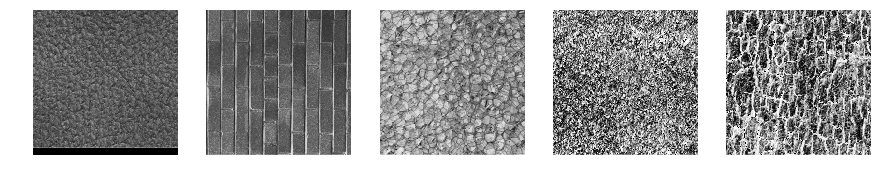

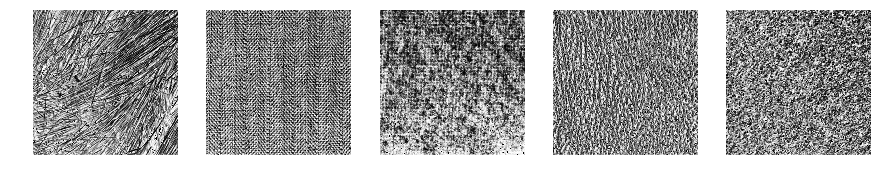

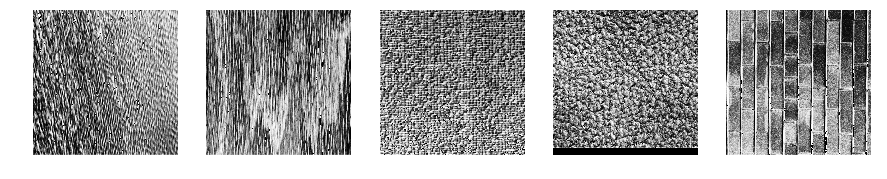

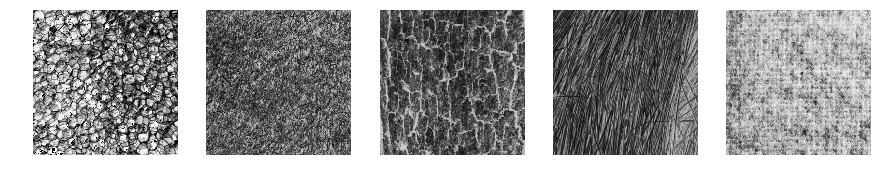

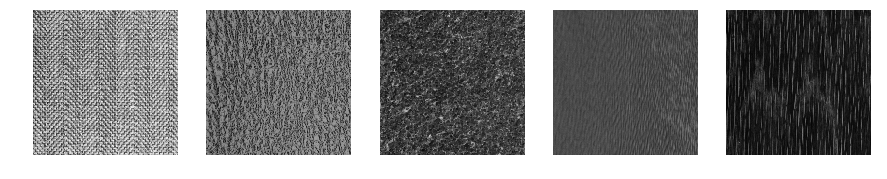

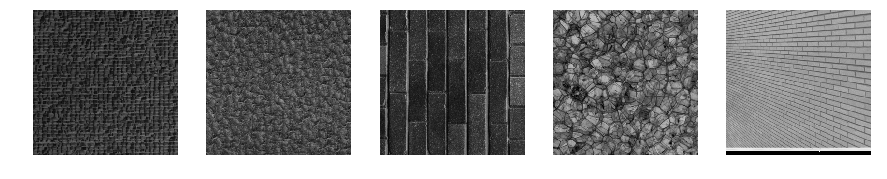

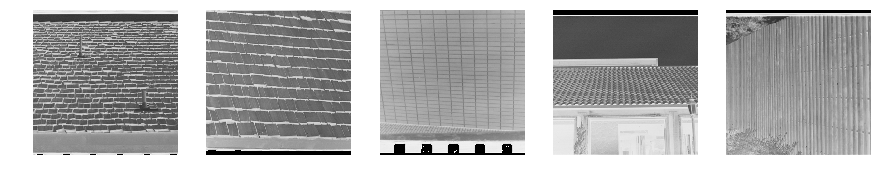

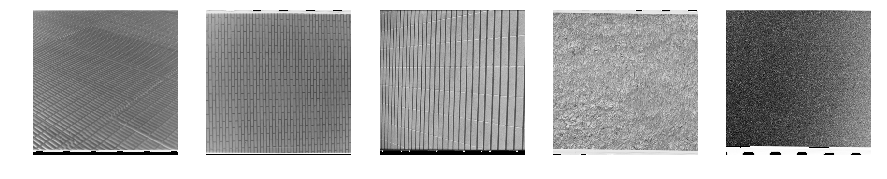

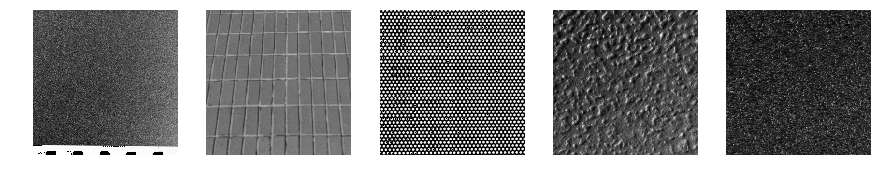

In [23]:
for i in range(11):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))
    for j in range(5):
        axes[j].imshow(textures[i*5+j])
        axes[j].axis('off')
    plt.show()